In [152]:
import tensorflow as tf
from skimage import data, io, transform
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np
import os

In [7]:
with tf.compat.v1.Session() as sess:
    
    #Build a Graph
    a = tf.constant([1,2,3,4,5])
    b = tf.constant([6,7,8,9,10])

    result = tf.multiply(a,b)

    print(sess.run(result))

[ 6 14 24 36 50]


In [75]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir((os.path.join(data_directory,d)))] 
    
    #print(os.listdir(data_directory))
    labels,images = [],[]
    
    for d in directories:
        label_directory = os.path.join(data_directory,d)
        
        file_names = [os.path.join(label_directory,f) 
                      for f in os.listdir(label_directory)
                      if f.endswith('.ppm')]
        
        for f in file_names:
            images.append(skimage.io.imread(f))
            labels.append(int(d))
    
    return images,labels

In [126]:
ROOT_PATH = '/Users/ModouNiang/Desktop/Neural-Network/'

#Creating Directiories containing training and testing data
train_data_directory = os.path.join(ROOT_PATH,'Training')
test_data_directory = os.path.join(ROOT_PATH,'Testing')

#Training data
images,labels = load_data(train_data_directory)

images = np.array(images)
#labels = np.array(labels)

print(len(set(labels)))

62


## Data Exploration

In [87]:
print('Image Dimesions: ',images.ndim)
print('Number of images: ',images.size)
#print(images[0])

Image Dimesions:  1
Number of images:  4575


In [90]:
print('Label Dimensions: ',labels.ndim)
print('Number of Labels: ',len(set(labels)))

Label Dimensions:  1
Number of Labels:  62


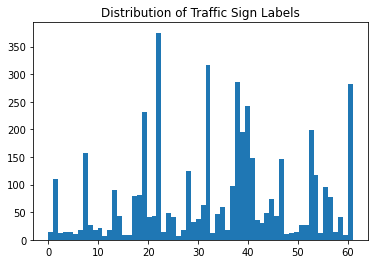

In [92]:
plt.hist(labels,62)
plt.title('Distribution of Traffic Sign Labels')
plt.show()

Shape: (236, 256, 3), Minimum: 0, Maximum: 255
Shape: (133, 164, 3), Minimum: 0, Maximum: 255
Shape: (122, 121, 3), Minimum: 0, Maximum: 255
Shape: (123, 123, 3), Minimum: 0, Maximum: 215


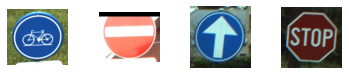

In [121]:
#Choosing random images and displaying them within a subplot
traffic_signs = [300,2250,3650,4000]

#Creating subplots to display the random images
for i in range(len(traffic_signs)):
    plt.subplot(1,4,i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    
    print('Shape: {}, Minimum: {}, Maximum: {}'.format(images[traffic_signs[i]].shape,
                                                       images[traffic_signs[i]].min(),
                                                       images[traffic_signs[i]].max()))

plt.show()

## Displaying Unique Labels

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


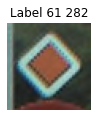

In [134]:
unique_labels = set(labels)
unique_labels
plt.figure(figsize=(15,15))

counter = 1
for label in unique_labels:
    
    image = images[labels.index(label)]
    
    #Define 64 subplots
    plt.subplot(8, 8, i)

    plt.axis('off')
    
    plt.title('Label {} {}'.format(label,labels.count(label)))
    
    counter += 1
    
    plt.imshow(image)
    
plt.show()

Shape: (28, 28, 3), Minimum: 0.08711484593837535, Maximum: 0.9921568627450981
Shape: (28, 28, 3), Minimum: 0.0, Maximum: 0.9921568627450981
Shape: (28, 28, 3), Minimum: 0.052893657462985216, Maximum: 0.9652661064425767
Shape: (28, 28, 3), Minimum: 0.052254651860744294, Maximum: 0.7078168767507003


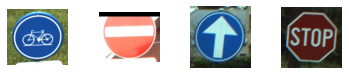

In [167]:
#Rescaling images to 28x28 images
images28 = [transform.resize(image,(28,28)) for image in images]
images28 = np.array(images28)

#Choosing random images and displaying them within a subplot
traffic_signs = [300,2250,3650,4000]

#Creating subplots to display the random images
for i in range(len(traffic_signs)):
    plt.subplot(1,4,i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    
    print('Shape: {}, Minimum: {}, Maximum: {}'.format(images28[traffic_signs[i]].shape,
                                                       images28[traffic_signs[i]].min(),
                                                       images28[traffic_signs[i]].max()))

plt.show()

TypeError: Invalid shape (28,) for image data

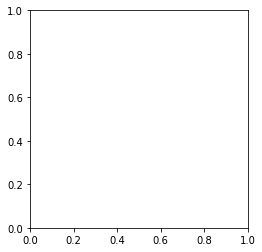

In [173]:
#Converting images to grayscale
images28 = np.array(images28)
images28 = rgb2gray(images28)

plt.imshow(images28[0])

#Choosing random images and displaying them within a subplot
traffic_signs = [300,2250,3650,4000]

#Creating subplots to display the random images
for i in range(len(traffic_signs)):
    plt.subplot(1,4,i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap='gray')
    plt.subplots_adjust(wspace=0.5)

plt.show()